<a href="https://colab.research.google.com/github/patternproject/r.sb.gtm1/blob/main/GTM_RevProj_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read ME

Excel hangs when plotting a plot for all the revenue projections across the market scenario (Pessimisitic, Realistic and Optimistic)

v1: First Version. Issues a) label of time on x-axis b) clarity of data

In [1]:

# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
# reading in input File
input_file = '/content/What IF - v 1 4 - Dump 2.xlsx'
df_master = read_xlsx(input_file, sheet=1)

In [5]:

# printing DF
print(as_tibble(df_master))

# A tibble: 24 x 17
   `MKT OUTLOOK` `VALUE PROPOSII… `PRODUCT VARIAN…  Lite `T+0` `T+1` `T+2`
   <chr>         <chr>            <chr>            <dbl> <dbl> <dbl> <dbl>
 1 Pessimistic   V1 - Scenario1   With All Options  7500     0     0     0
 2 Pessimistic   V1 - Scenario1   With No Options   6100     0     0     0
 3 Pessimistic   V1 - Scenario2   With All Options  7500     0     0     0
 4 Pessimistic   V1 - Scenario2   With No Options   6500     0     0     0
 5 Pessimistic   V1 - Scenario3   With All Options  7550     0     0     0
 6 Pessimistic   V1 - Scenario3   With No Options   6500     0     0     0
 7 Pessimistic   V1 - Scenario4   With All Options  7550     0     0     0
 8 Pessimistic   V1 - Scenario4   With No Options   6500     0     0     0
 9 Realistic     V1 - Scenario1   With All Options  7500     0     0     0
10 Realistic     V1 - Scenario1   With No Options   6100     0     0     0
# … with 14 more rows, and 10 more variables: `T+3` <dbl>, `T+4` <dbl>,
#   `T+5

In [6]:
str(df_master)

tibble [24 × 17] (S3: tbl_df/tbl/data.frame)
 $ MKT OUTLOOK     : chr [1:24] "Pessimistic" "Pessimistic" "Pessimistic" "Pessimistic" ...
 $ VALUE PROPOSIION: chr [1:24] "V1 - Scenario1" "V1 - Scenario1" "V1 - Scenario2" "V1 - Scenario2" ...
 $ PRODUCT VARIANT : chr [1:24] "With All Options" "With No Options" "With All Options" "With No Options" ...
 $ Lite            : num [1:24] 7500 6100 7500 6500 7550 6500 7550 6500 7500 6100 ...
 $ T+0             : num [1:24] 0 0 0 0 0 0 0 0 0 0 ...
 $ T+1             : num [1:24] 0 0 0 0 0 0 0 0 0 0 ...
 $ T+2             : num [1:24] 0 0 0 0 0 0 0 0 0 0 ...
 $ T+3             : num [1:24] 401625 326655 1204875 1044225 404302 ...
 $ T+4             : num [1:24] 803250 653310 2409750 2088450 808605 ...
 $ T+5             : num [1:24] 1606500 1306620 4819500 4176900 1617210 ...
 $ T+6             : num [1:24] 2142000 1742160 6426000 5569200 2156280 ...
 $ T+7             : num [1:24] 2744438 2232142 8233312 7135538 2762734 ...
 $ T+8             : 

In [7]:
df_1 <- df_master

In [8]:
names(df_1)

[1] "MKT OUTLOOK"      "VALUE PROPOSIION" "PRODUCT VARIANT"  "Lite"            
 [5] "T+0"              "T+1"              "T+2"              "T+3"             
 [9] "T+4"              "T+5"              "T+6"              "T+7"             
[13] "T+8"              "T+9"              "T+10"             "T+11"            
[17] "T+12"

In [21]:
df_1$MKT_OUTLOOK_f <- as.factor(df_1$'MKT OUTLOOK')

In [22]:
df_1$VALUE_PROPOSITION_f <- as.factor(df_1$'VALUE PROPOSIION')

In [23]:
df_1$PRODUCT_VARIANT_f <- as.factor(df_1$'PRODUCT VARIANT')

In [24]:
df_1 %>%
  pivot_longer(cols = starts_with("T+"), names_to = "period", values_to = "amount") -> df_2

In [25]:
df_2 %>% select(-'MKT OUTLOOK',-'VALUE PROPOSIION',-'PRODUCT VARIANT') -> df_3

In [26]:
head(df_3)

Lite,MKT_OUTLOOK_f,VALUE_PROPOSITION_f,PRODUCT_VARIANT_f,period,amount
<dbl>,<fct>,<fct>,<fct>,<chr>,<dbl>
7500,Pessimistic,V1 - Scenario1,With All Options,T+0,0
7500,Pessimistic,V1 - Scenario1,With All Options,T+1,0
7500,Pessimistic,V1 - Scenario1,With All Options,T+2,0
7500,Pessimistic,V1 - Scenario1,With All Options,T+3,401625
7500,Pessimistic,V1 - Scenario1,With All Options,T+4,803250
7500,Pessimistic,V1 - Scenario1,With All Options,T+5,1606500


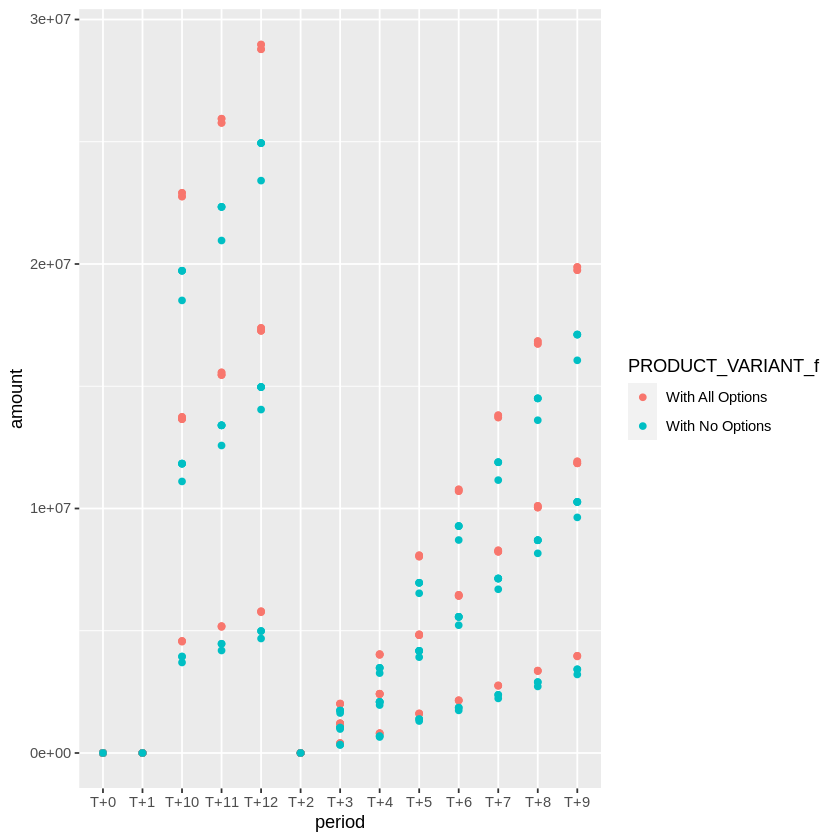

In [35]:
p1 <- ggplot(df_3, aes(x = period, y = amount))
# Scatter plot 
p1 <- p1 + geom_point(aes(color=PRODUCT_VARIANT_f))
p1

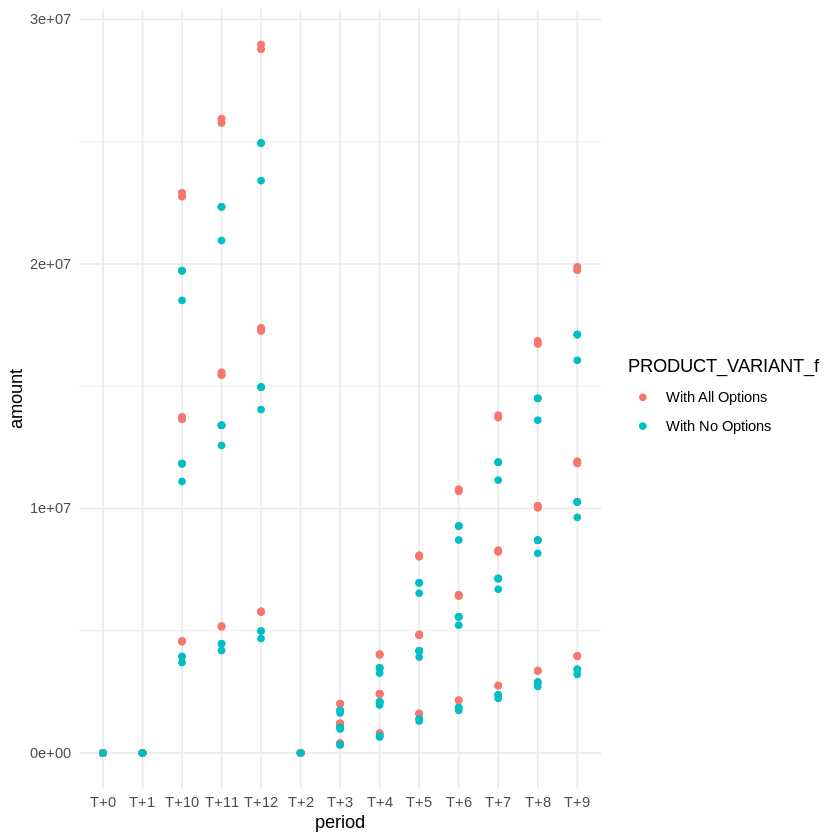

In [36]:
p1 <- p1 + theme_minimal()
p1

In [38]:

# Split in vertical direction
p1 <- p1 + facet_grid(MKT_OUTLOOK_f ~ VALUE_PROPOSITION_f)

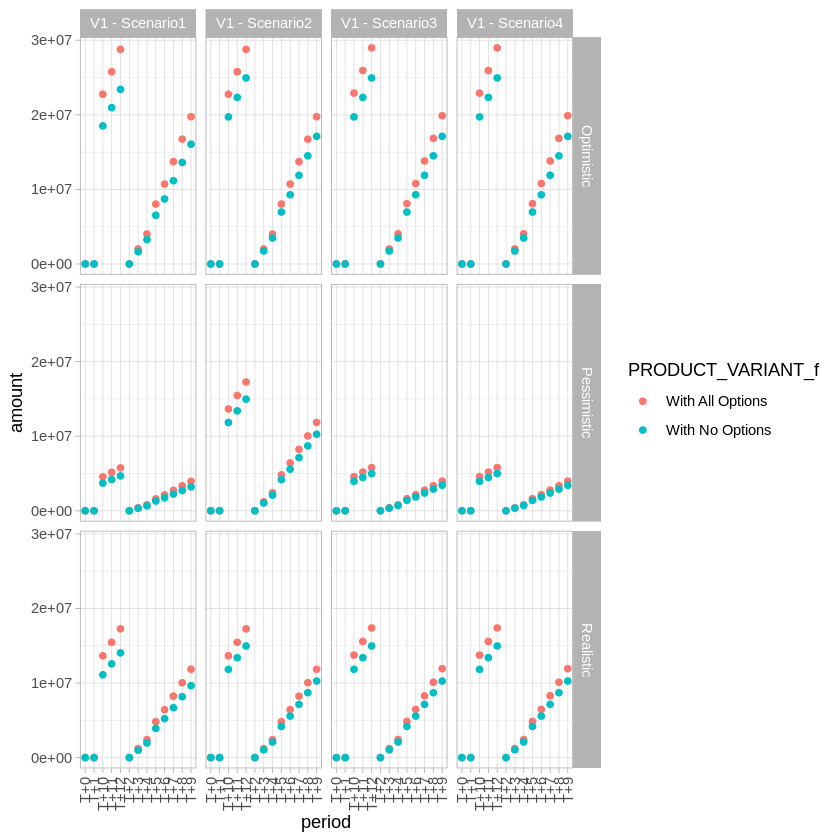

In [39]:
g1 <- p1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

In [40]:
p1 <- p1 + facet_grid(VALUE_PROPOSITION_f ~ MKT_OUTLOOK_f)

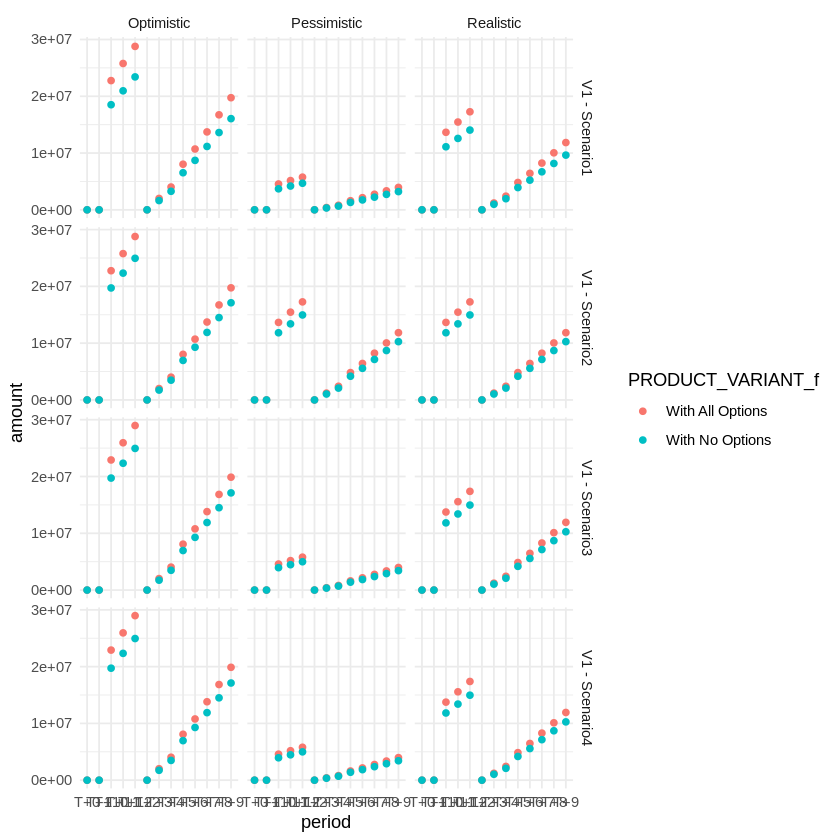

In [41]:
p1

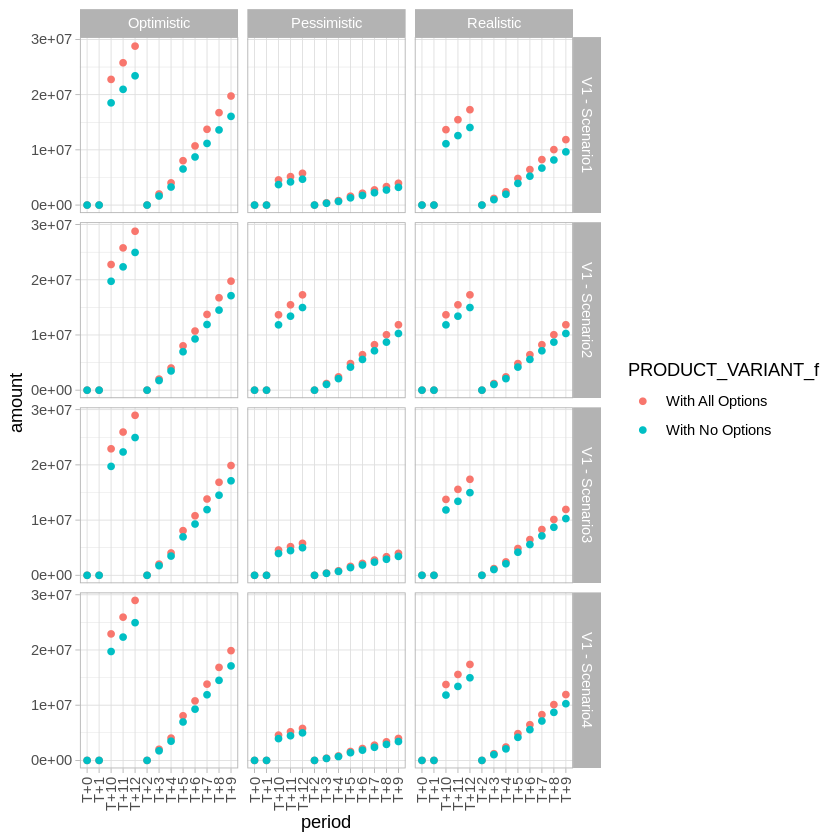

In [42]:
g1 <- p1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

In [43]:
names(df_3)

[1] "Lite"                "MKT_OUTLOOK_f"       "VALUE_PROPOSITION_f"
[4] "PRODUCT_VARIANT_f"   "period"              "amount"

In [44]:
str(df_3)

tibble [312 × 6] (S3: tbl_df/tbl/data.frame)
 $ Lite               : num [1:312] 7500 7500 7500 7500 7500 7500 7500 7500 7500 7500 ...
 $ MKT_OUTLOOK_f      : Factor w/ 3 levels "Optimistic","Pessimistic",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ VALUE_PROPOSITION_f: Factor w/ 4 levels "V1 - Scenario1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ PRODUCT_VARIANT_f  : Factor w/ 2 levels "With All Options",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ period             : chr [1:312] "T+0" "T+1" "T+2" "T+3" ...
 $ amount             : num [1:312] 0 0 0 401625 803250 ...


In [45]:
period_f <- factor(c("T+0","T+1","T+2","T+3","T+4","T+5","T+6","T+7","T+8","T+9","T+10","T+11","T+12"))

In [46]:
ordered(sizes, levels = c("small", "medium", "large"))
#df_3$period_f <- factor(df_3$period, levels=rev(levels(period_f)))

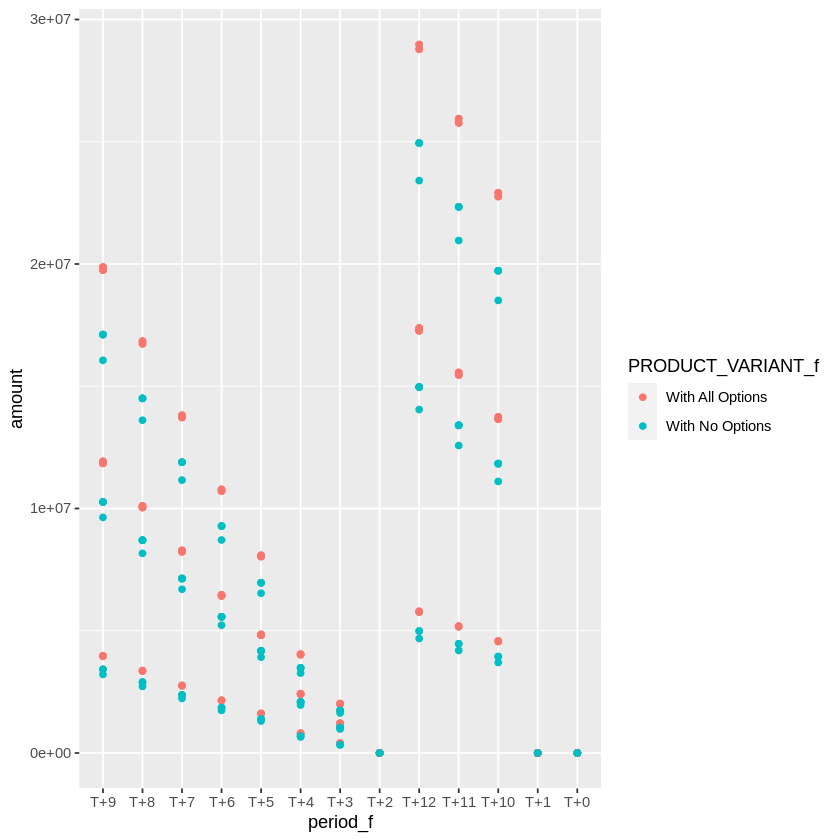

In [47]:
p1 <- ggplot(df_3, aes(x = period_f, y = amount))
# Scatter plot 
p1 <- p1 + geom_point(aes(color=PRODUCT_VARIANT_f))
p1